In [2]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
import importlib
import pickle
from utils.data_utils import *
from utils.preprocessing import *
from utils.helper import *
root = '/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = build_dataset()

In [77]:
base_model = os.path.join(root,'model_0')
config = parse_conf_file(os.path.join(base_model,'conf_model.json'))

In [78]:
from utils.train_utils import *

In [ ]:
model = Model(config)

{'hiddens': 60, 'lr': 0.0001, 'reg': 1e-06}
Loading the prepro pipeline
{u'pipe_kwargs': {u'micro': {u'FeatureSelector__features': [u'leafwet450_min',
                                                            u'leafwet_lwscnt',
                                                            u'percip_mm',
                                                            u'temp',
                                                            u'gusts_ms',
                                                            u'wind_ms',
                                                            u'leafwet460_min',
                                                            u'wind_dir',
                                                            u'humidity'],
                             u'FillRemainingNaN__method': u'bfill',
                             u'MissingValueInputer__method': u'time'}},
 u'pipe_list': {u'micro': [u'FeatureSelector',
                           u'MissingValueInputer',
                  

In [51]:
model.nb_epochs = 2
model.train()

# Neural Network with 23521 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  in      Nonex36
     lstm_0  Nonex60
             60
     dense   1
             None

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  ------
      1      15.34862       6.83217      2.24652  33.29s
      2      12.46265       6.00638      2.07490  32.20s
Loading best param
Loaded parameters to layer 'lstm_0' (shape 36x60).
Loaded parameters to layer 'lstm_0' (shape 60x60).
Loaded parameters to layer 'lstm_0' (shape 60).
Loaded parameters to layer 'lstm_0' (shape 36x60).
Loaded parameters to layer 'lstm_0' (shape 60x60).
Loaded parameters to layer 'lstm_0' (shape 60).
Loaded parameters to layer 'lstm_0' (shape 36x60).
Loaded parameters to layer 'lstm_0' (shape 60x60).
Loaded parameters to layer 'lstm_0' (shape 60).
Loaded parameters to layer 'lstm_0' (shape 36x60).
Loaded parameters to layer 'lstm_0' (shape 60x60).
L

In [53]:
base_model

'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_4'

In [60]:
from utils import pipe_def

In [37]:
pipe.set_params(**{'index__df':train['yield']})

Pipeline(steps=[('feature', FeatureUnion(n_jobs=1,
       transformer_list=[(u'macro_sidi', Pipeline(steps=[(u'FeatureSelector', FeatureSelector(features=[u'sidi_T', u'sidi_Po', u'sidi_P', u'sidi_Pa', u'sidi_U', u'sidi_Ff', u'sidi_Tn', u'sidi_Tx', u'sidi_VV', u'sidi_Td', u'sidi_tR', u'sidi_Tg', u'sidi_sss'])...00000
2015-11-03 18:00:00    0.000000
2015-11-03 20:00:00    0.000000
Name: yield, dtype: float64))])

In [27]:
pipe.set_params({'index__df':train})

TypeError: set_params() takes exactly 1 argument (2 given)

In [18]:
pipe.transform(train)

ValueError: Shape of passed values is (36, 4425), indices imply (36, 7392)

In [16]:
dt.benchmark()

Le train is composed by 3 group and 4425 observation
Le val is composed by 3 group and 2213 observation
Le test is composed by 3 group and 739 observation


ValueError: Shape of passed values is (36, 4425), indices imply (36, 7392)

In [9]:
train,val,test= train_val_test_split(df)

Le train is composed by 3 group and 4425 observation
Le val is composed by 3 group and 2213 observation
Le test is composed by 3 group and 739 observation


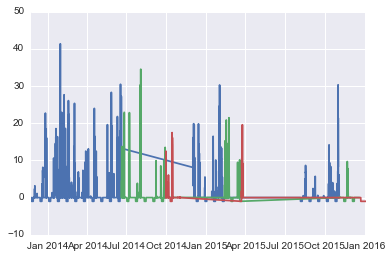

In [12]:
plt.plot(train['yield'])
plt.plot(val['yield'])
plt.plot(test['yield'])

In [13]:
train.columns

Index([u'gusts_ms', u'humidity', u'leafwet450_min', u'leafwet460_min',
       u'leafwet_lwscnt', u'percip_mm', u'temp', u'type', u'wind_dir',
       u'wind_ms', u'yield', u'guel_T', u'guel_P0', u'guel_P', u'guel_U',
       u'guel_DD', u'guel_Ff', u'guel_ff10', u'guel_WW', u'guel_W'W'',
       u'guel_c', u'guel_VV', u'guel_Td', u'sidi_T', u'sidi_Po', u'sidi_P',
       u'sidi_Pa', u'sidi_U', u'sidi_Ff', u'sidi_Tn', u'sidi_Tx', u'sidi_VV',
       u'sidi_Td', u'sidi_tR', u'sidi_Tg', u'sidi_sss', u'aga_T', u'aga_P0',
       u'aga_P', u'aga_U', u'aga_DD', u'aga_Ff', u'aga_ff10', u'aga_WW',
       u'aga_W'W'', u'aga_c', u'aga_VV', u'aga_Td', u'group'],
      dtype='object')